<a href="https://colab.research.google.com/github/igquinteroch/TC4030.10-ML-coursework/blob/main/01-multiple-linear-regression/act02-california-housing-prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 Activity

## Course: Artificial Intelligence and Machine Learning

* ### Ignacio Antonio Quintero Chávez.
* ### A01794419

**Important notes**

* You can work with the document either on Google Colab on your local machine.
* You should only work with the "california_housing_train.csv" file.
* This activity only consists of 3 exercises, divided into 3 parts.
* **You will only have to modify this file by adding your lines of code in the 3 parts indicated.**
* **Any modification outside these areas will deduct points from the activity.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [4]:
# Create a dataframe with the california housing train file

DIR = "/content/sample_data/"
os.chdir(DIR)

df = pd.read_csv("california_housing_train.csv", sep=",")
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Exercise 1: Pearson Correlation Matrix

**Instructions:**

In this exercise you must only display the correlation matrix of the variables of the "df" dataframe, including in each cell of the matrix the numerical value of the correlation between each pair of variables.

When displaying the correlation matrix you must also use the heatmap option of the seaborn library, using the 'BuGn' color map.

You can consult the following documentation:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://matplotlib.org/stable/tutorials/colors/colormaps.html

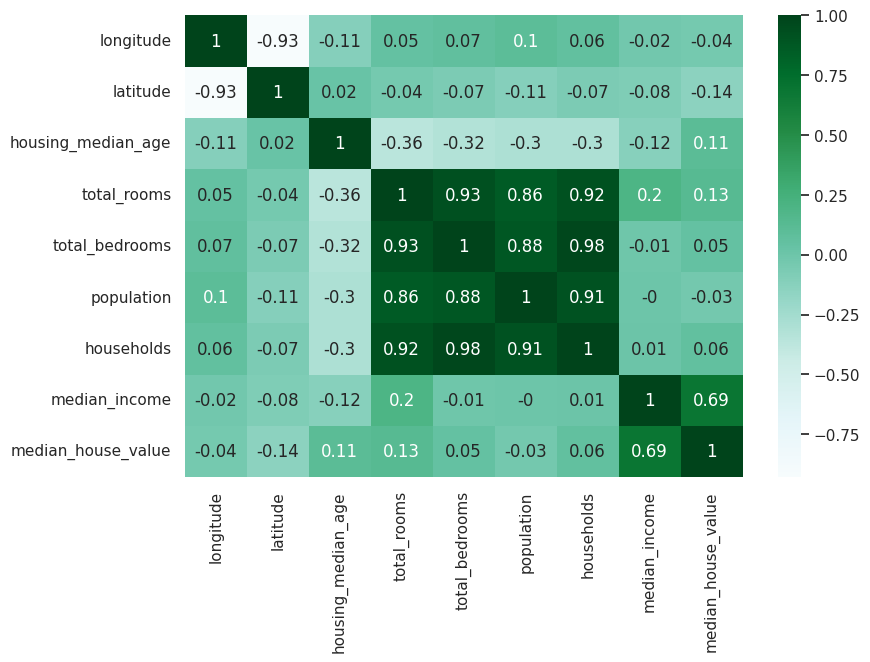

In [6]:
# Set the figure size
sns.set(rc={'figure.figsize':(9,6)})

################################################################################################################

# Create the correlation matrix - round function to display only 2 decimals
corr_matrix = round(df.corr("pearson", 1),2)
sns.heatmap(corr_matrix, cmap="BuGn", annot = True)

################################################################################################################
plt.show();

### Exercise 2: Transformations and Histograms of variables

**Instructions:**

In this exercise you should only work with the following 7 variables:

* housing_median_age
* total_rooms
* total_bedrooms
* population
* households
* median_income
* median_house_value

You should apply the following transformations to each of these columns and display their histograms with 20 bins:

* Square root with Numpy.
* Natural logarithm with Numpy.
* Power 2 (i.e., squaring) with Numpy.
* Box-Cox with scikit-learn.

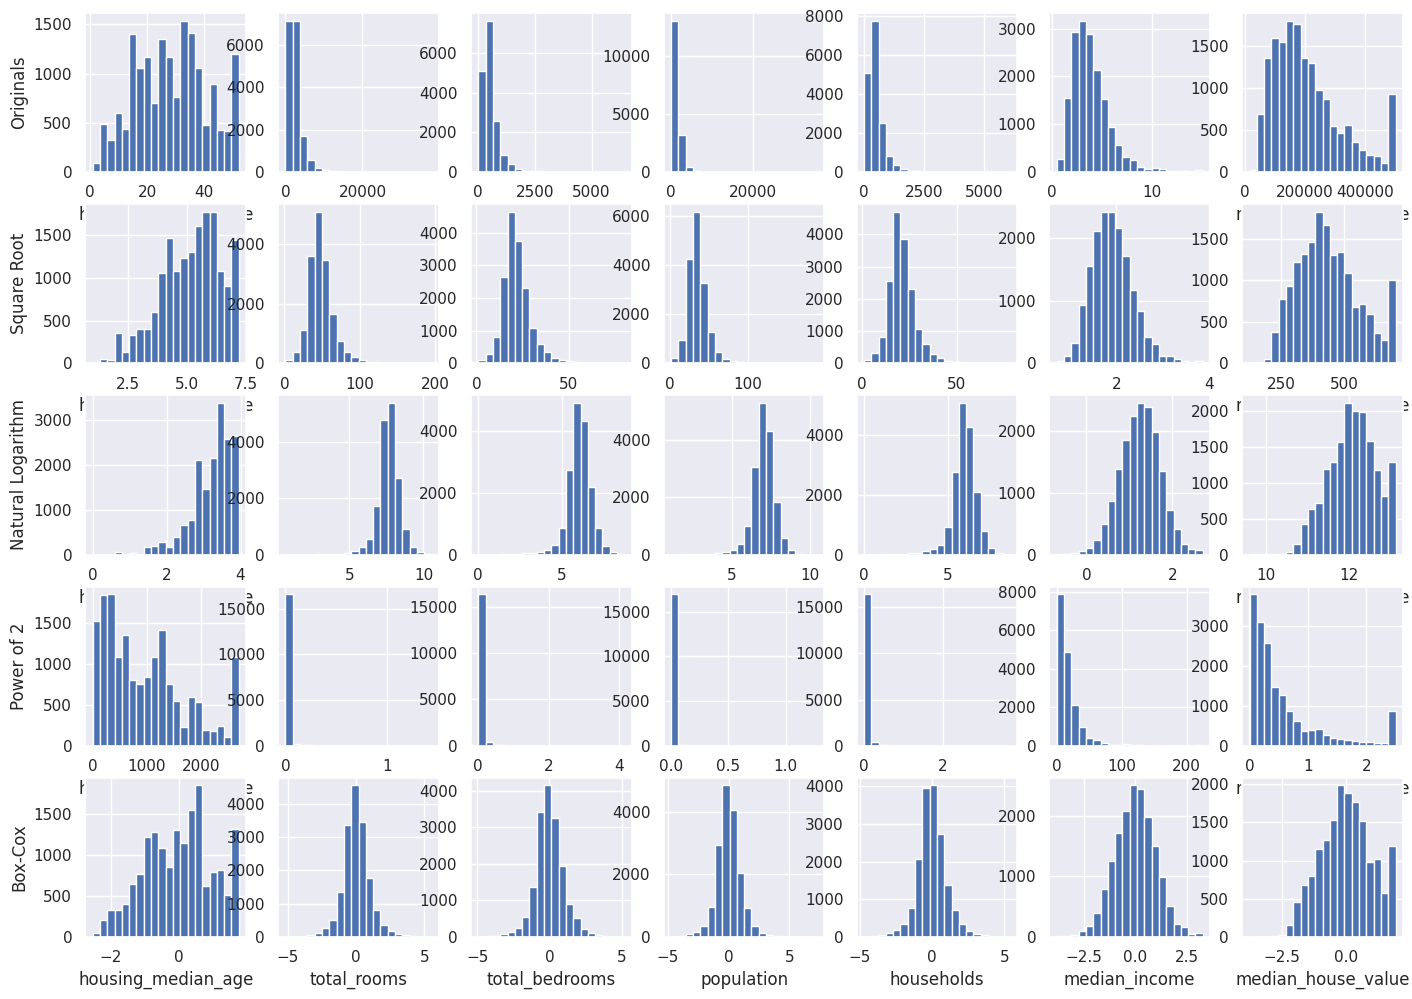

In [11]:
# Create a list with the 7 variables we will work on this exercise
transf_variables = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']


sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 7)

for k in range(0,7):

    ################################################################################################################

    # Original data
    plt.subplot(5,7,k+1)

    # Assign the values of 'k' without a transformation
    Transf0 = df[transf_variables[k]]

    # Add the command to get the histogram with 20 bins
    plt.hist(Transf0, bins=20)

    plt.xlabel(transf_variables[k])
    if k==0:
      plt.ylabel("Originals")


    # Square Root
    plt.subplot(5,7,k+8)

    # Apply the square root to each value from 'k' without transformation
    Transf1 = np.sqrt(Transf0)
    # Add the command to get the histogram with 20 bins
    plt.hist(Transf1, bins=20)

    plt.xlabel(transf_variables[k])
    if k==0:
      plt.ylabel("Square Root")


    # Natural Logarithm
    plt.subplot(5,7,k+15)

    # Apply the natural logarithm to each value from 'k' without transformation
    Transf2 = np.log(Transf0)
    # Add the command to get the histogram with 20 bins
    plt.hist(Transf2, bins=20)

    plt.xlabel(transf_variables[k])
    if k==0:
      plt.ylabel("Natural Logarithm")


    # Power of 2
    plt.subplot(5,7,k+22)

    # Apply the power of 2 to each value from 'k' without transformation
    Transf3 = np.power((Transf0),2)
    # Add the command to get the histogram with 20 bins
    plt.hist(Transf3, bins=20)

    plt.xlabel(transf_variables[k])
    if k==0:
      plt.ylabel("Power of 2")


    # Box-Cox
    plt.subplot(5,7,k+29)

    # Apply the box-cox transformation to each value from 'k' without transformation
    Transf4 = power_transform(np.array(Transf0).reshape(-1,1), method='box-cox')
    # Add the command to get the histogram with 20 bins
    plt.hist(Transf4, bins=20)


    plt.xlabel(transf_variables[k])
    if k==0:
      plt.ylabel('Box-Cox')

    ################################################################################################################

plt.show();

### Exercise 3: Performance metrics: $RMSE$, $MAE$, and $MAPE$

**Instructions:**

Each of the metrics can be calculated using the actual observed values ​​$y$, the predicted values ​​$\hat{y}$ and the total records $n$.

In this exercise you will define each of these metrics using three functions that you will call my_RMSE, my_MAE and my_MAPE.

Each of the three functions you define must have two arguments, namely the actual observed values ​​$y$ and the predicted values ​​$\hat{y}$.

The return value must be the actual numerical value given by the formula that defines it.

You should only be able to use NumPy's mean, square, and abs functions, and basic arithmetic operations.

For the definition of each of them, at most 5 lines of code in total would be expected, but they may be less. An amount greater than this will be penalized.

In [12]:
#########################################################################

# Define the function mi_RMSE:
def mi_RMSE(y_real,y_prediction):
  RMSEv = np.sqrt(np.mean((y_real - y_prediction) **2))
  return(RMSEv)

# Define the function mi_MAE:
def mi_MAE(y_real,y_prediction):
  MAEv = np.mean(np.abs(y_real - y_prediction))
  return (MAEv)

# Define the function mi_MAPE:
def mi_MAPE(y_real,y_prediction):
  MAPEv = np.mean(np.abs((y_real - y_prediction) / y_real)) *100
  return (MAPEv)

#########################################################################

In [13]:
Xtrain = df.drop('median_house_value', axis='columns')
ytrain = df['median_house_value']

num_prepro_pipeline = Pipeline(steps = [('imputar', SimpleImputer(strategy='median')),
                                        ('scalar', MinMaxScaler(feature_range=(1, 2))),
                                        ('sqrt', FunctionTransformer(np.sqrt))
                                        ])

numerical_features = ['total_rooms','total_bedrooms','population','households','median_income']

columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, numerical_features)],
                                        remainder='passthrough')

modelo_LR = LinearRegression()

scores_RMSEVal = []
scores_MAEVal = []
scores_MAPEVal = []

kf = KFold(n_splits= 10, shuffle=True)

for train_index, val_index in kf.split(Xtrain):

  X_train, X_val = Xtrain.loc[train_index], Xtrain.loc[val_index]
  y_train, y_val = ytrain[train_index], ytrain[val_index]

  XtrainFit = columnasTransformer.fit(X_train)
  XtrainTransf = XtrainFit.transform(X_train)

  modelo_LR = modelo_LR.fit(XtrainTransf, y_train)

  XvalTransf = XtrainFit.transform(X_val)
  yhatVal = modelo_LR.predict(XvalTransf)

  scores_RMSEVal.append(mi_RMSE(y_val, yhatVal))
  scores_MAEVal.append(mi_MAE(y_val, yhatVal))
  scores_MAPEVal.append(mi_MAPE(y_val, yhatVal))


# Show the information
results = [scores_RMSEVal, scores_MAEVal, scores_MAPEVal]
names = ['RMSEval','MAEval','MAPEval']

print("\t  %s\t\t%s   \t\t%s" % (names[0],names[1],names[2]))
for i,z in enumerate(zip(scores_RMSEVal, scores_MAEVal, scores_MAPEVal)):
  print("fold[%d]:  %.1f \t\t%.1f  \t\t%.1f%%" % (i+1,z[0],z[1],z[2]))
print("mean(std) %.1f(%.1f)  \t%.1f(%.1f)   \t%.1f%% (%.1f)" % (np.mean(scores_RMSEVal), np.std(scores_RMSEVal),
                                                                np.mean(scores_MAEVal), np.std(scores_MAEVal),
                                                                np.mean(scores_MAPEVal), np.std(scores_MAPEVal)))

	  RMSEval		MAEval   		MAPEval
fold[1]:  69332.5 		51933.6  		30.8%
fold[2]:  65637.7 		48832.3  		28.0%
fold[3]:  68366.4 		50520.8  		30.4%
fold[4]:  70429.0 		49799.3  		29.6%
fold[5]:  69464.9 		51686.4  		30.7%
fold[6]:  70758.4 		51172.9  		30.3%
fold[7]:  69103.4 		51198.4  		32.6%
fold[8]:  68116.5 		49803.7  		30.5%
fold[9]:  69399.1 		50758.0  		30.2%
fold[10]:  69815.3 		51143.5  		29.2%
mean(std) 69042.3(1369.8)  	50684.9(911.0)   	30.2% (1.1)


**\<\<End of Activity 2>>**